In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('energy_consumption.csv')
print(data)

                     date  energy_consumption  temperature   humidity
0     2020-01-01 00:00:00          524.835708    21.126283  70.608266
1     2020-01-01 01:00:00          493.086785    23.146803  44.709753
2     2020-01-01 02:00:00          532.384427    18.504655  48.142632
3     2020-01-01 03:00:00          576.151493    23.396469  38.872359
4     2020-01-01 04:00:00          488.292331    16.449317  59.483393
...                   ...                 ...          ...        ...
8780  2020-12-31 20:00:00          463.266445    22.002160  57.295904
8781  2020-12-31 21:00:00          547.796791    27.159445  50.933870
8782  2020-12-31 22:00:00          559.177455    17.704978  52.013260
8783  2020-12-31 23:00:00          441.766833    13.092255  46.173477
8784  2021-01-01 00:00:00          439.804318    11.941415  39.475581

[8785 rows x 4 columns]


In [3]:
data['date'] = pd.to_datetime(data['date'])

data.set_index('date', inplace=True)

data['month'] = data.index.month
data['day'] = data.index.day
data['hour'] = data.index.hour


In [4]:
train, test = train_test_split(data, test_size=0.2, shuffle=False)

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

X_train, y_train = train_scaled[:, :-1], train_scaled[:, -1]
X_test, y_test = test_scaled[:, :-1], test_scaled[:, -1]


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.0042378500186844


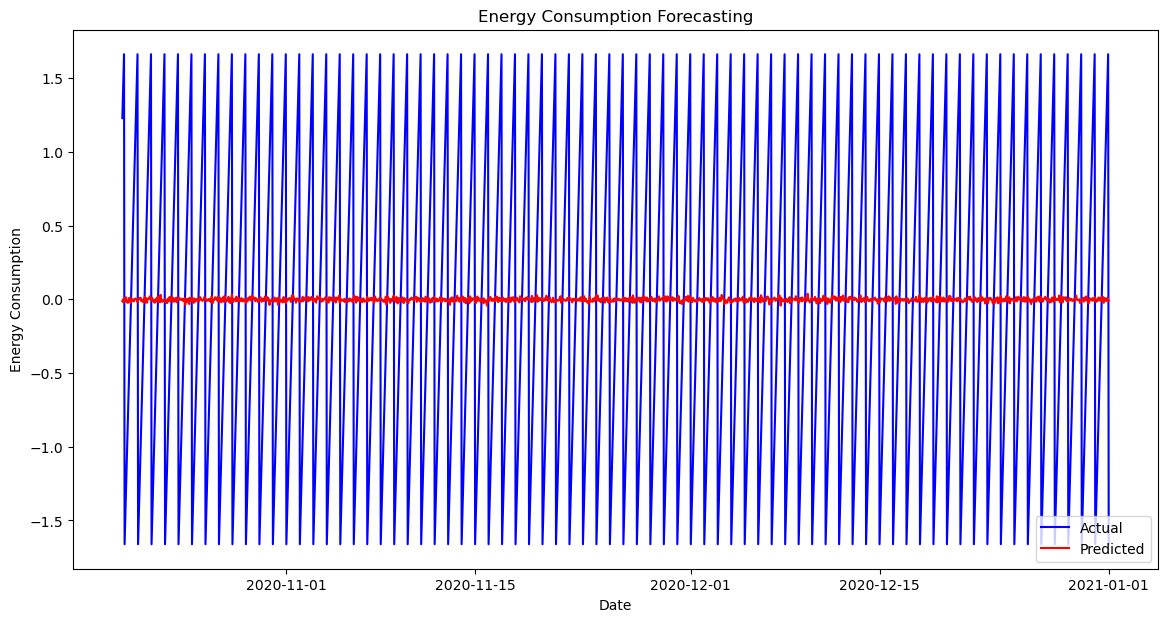

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(test.index, y_test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecasting')
plt.legend()
plt.show()
